<a href="https://colab.research.google.com/github/rahultj333/RJ--Capstone-Project--Play-Store-App-Analysis-/blob/main/RAHUL_J_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.**

# **Problem Statement**

1) Two datasets are provided, one with basic information of Play Store App  and 
Second one is of users reviews.

2) Every row contains various entries regarding a certain app. We will be doing Exploratory data analysis on this data set, which is a very important step in data science cycle, as it not only helps in taking very initial business decisions .Our objective will be to structure the data, clean it and present certain trends that we observe that can help us draw very preliminary conclusions about the probability of success of a newly launched app.  Also our objective is to Explore and analyze the data to discover key factors responsible for app engagement and success.

3) We have to make a valuable insights from both the datasets in order to identify the important characteristics. 



# **Dataset Construction**

	Mounting the drive : Because of Mounting we can access csv file to do analysis

	Loading Datasets : Two datasets is there in project First is store app and Second is User Reviews 

	Import Libraries: Compulsory to use Libraries like Numpy , Pandas , Matplotlib and Seaborn .

	When your using Google colab then this necessary to use %matplotlib inline where plot graphics will appear in your notebook

	Data Cleaning: Removing Outliers , Finding and Removing Null values

	Data Assings: Replacing the Null Values with Mean ,Median & Mode with its suitable Condition.

	Query Analysis: Analayzing the data sets to points of interest using visualization.

In [1]:
#importing libraries used in the project

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To access data set from drive mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV files 
path_review='/content/drive/MyDrive/ALMABETTER - DATA SCI/DATA OF PROGRAM/User Reviews.csv'
path_data='/content/drive/MyDrive/ALMABETTER - DATA SCI/DATA OF PROGRAM/Play Store Data.csv'
df1=pd.read_csv(path_review)
df2=pd.read_csv(path_data)

### First we will analyse and clean the first data set (User Review) and after that we'll analyse and clean the second data set(Play Store Data).

#User Review Data exploration

User reviews dataset.csv: shape(64295,5)
 This file contain 5 features that is:

i.	App: Its contain Apps Name.

ii.	Translated Review: It contain reviews

iii.	Sentiments: It contain Positive ,Negative, Neutral Sentiments.

iv.	Sentiment Subjectivity:It contain Numeric values between negative to positive 1.

v.	Sentiment Polarity: defines the orientation of the expressed sentiment 


In [4]:
# Let's check the first few rows 
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
# Let's check the last few rows
df1.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [6]:
# Checking the shape of the dataframe
df1.shape

(64295, 5)

In [7]:
# Getting the idea of the dataset to know about the non-null count of each column.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
# Let's know the sum of null values in each column.
df1.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

#Play Store App Data Exploration

Play store dataset.csv: shape(10841,13)
This file contain 13 features that is: 

i.	App: Name of Apps.

ii.	Category:Category of Apps (ART_AND_DESIGN,FINANCE,COMIC,COMMUNICATION,GAME etc)

iii.	Rating:Rating on app and it is between 0 to 5 

iv.	Reviews:Total Users given reviews on every app

v.	Size:Size is in Megabytes(MB)

vi.	Installs:Number of times the app was downloaded from google play

vii.	Type:Type is Paid or Free

viii.	Price:Price is in $

ix.	Content Rating:Which Age Group have Rated the App 


In [9]:
# Let's check the first few rows 

df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Let's check the last few rows 

df2.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
# Checking the shape of the dataframe

df2.shape

(10841, 13)

In [12]:
# Getting the idea of the dataset to know about the non-null count of each column.

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Data Cleaning For User Reviews dataset

# **Cleaning the data of playstore database**
1) Finding carbage values from all the colums and drop the rows 

2) Drop the found carpage containing rows 

3) Coverting 'Size' column into valid numeric column 

4) Coverting 'Reviews' column into valid numeric column 

5) Coverting 'Installs' column into valid numeric column 

In [14]:
# Let's know the sum of null values in each column.

df1.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [15]:
#drop the Null value 

index = df1[df1['Translated_Review'].isna()].index
df1.drop(axis=0, inplace=True, index=index)

Looking at Cleaned User Review Data

In [16]:
# Let's check few sample rows 

df1.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
42383,FOX NOW - On Demand & Live TV,I tried watch several movies everyone said pro...,Neutral,0.000000,0.000000
8195,"Any.do: To-do list, Calendar, Reminders & Planner",This THE BEST market. I manage monthly appoint...,Positive,0.508333,0.476190
41724,Extreme Coupon Finder,Worthless. It's place grocery lists can't even...,Positive,0.016667,0.650000
54524,Golf GPS by SwingxSwing,Don't love new UI. adding full score card take...,Positive,0.296591,0.451136
62341,HipChat - Chat Built for Teams,Push notifications rarely work anymore.,Positive,0.300000,0.900000


In [17]:
# let's get count of each setiment in dataset df1

df1['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

#Data Cleaning for Play Store App dataset

In [18]:
# let's get count of each category in dataset df2

df2['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The category 1.9 seems suspicious!!! 

In [19]:
#droping the row with 1.9 category
index=df2[df2['Category']=='1.9'].index
df2.drop(axis=0, inplace=True, index=index)

In [20]:
# Let's check few sample rows 

df2.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4399,Guns'n'Glory,FAMILY,4.4,89947,22M,"5,000,000+",Free,0,Everyone 10+,Strategy,"February 9, 2018",1.8.2,4.0 and up
2246,ASCCP Mobile,MEDICAL,4.5,63,25M,"10,000+",Paid,$9.99,Everyone,Medical,"October 3, 2016",2.1.1,2.2 and up
5987,Outdoor Movies BC,EVENTS,2.9,7,Varies with device,500+,Free,0,Everyone,Events,"June 22, 2018",Varies with device,4.4 and up
4963,ONScripter Plus (Ad Free),GAME,4.5,100,17M,"1,000+",Paid,$3.99,Everyone,Adventure,"April 7, 2016",1.2.4,4.1 and up
6226,BH Patrole,AUTO_AND_VEHICLES,4.8,27,2.5M,500+,Free,0,Everyone,Auto & Vehicles,"February 15, 2018",2.0,4.4 and up


The sizes of the apps are in megabytes(M) and kilobytes(k). We will keep all the values of the column 'Size' in kilobyte.

In [21]:
# cleaning the dataset in column size with the hep of user define function

def clean_size(size):
  if size[-1]=='M':
    new_size=float(size.replace('M',''))
  elif size[-1]=='k':
    new_size=size.replace('k','')
    new_size=round(float(new_size)/1024,2)
  else:
    new_size=size
  return (new_size)

In [22]:
df2['Size'] = df2['Size'].apply(clean_size)

We will remove + and , from the column 'Install' and will convert the datatype to float.

In [23]:
# cleaning the dataset in column installs with the hep of user define function

def clean_install(num):
  if '+' in num:
    new_install=num.replace('+','')
    if ','in new_install:
      final_install=new_install.replace(',','')
    else:
      final_install=new_install
  else:
    final_install=num
  return float(final_install)

In [24]:
df2['Installs'] = df2['Installs'].apply(clean_install)

Though some apps are free, but those apps which are of type 'paid' have price in dollors($). 

We will be removing that '$' sign and convert the column into float datatype.

In [25]:
# cleaning the dataset in column price with the hep of user define function

def clean_price(num):
  if num[0]=='$':
    price=num.replace('$','')
  else:
    price=num
  return float(price)

In [26]:
df2['Price']=df2['Price'].apply(clean_price)

In [27]:
# cleaning the dataset in column Rating with the hep of user define function

df2['Rating'] = df2['Rating'].astype(float)
rating_median=df2['Rating'].median(skipna = True)
df2['Rating']=df2['Rating'].fillna(rating_median)

In [28]:
df2.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [29]:
# cleaning the dataset in columns Android ver , Current ver and Genres

index = df2[df2['Android Ver'].isna()].index
df2.drop(axis=0, inplace=True, index=index)
#
index = df2[df2['Current Ver'].isna()].index
df2.drop(axis=0, inplace=True, index=index)
#
index = df2[df2['Genres'].isna()].index
df2.drop(axis=0,inplace= True, index=index)

In [30]:
df2.drop_duplicates(subset = 'App', inplace = True)

In [31]:
# here we changed Date format

df2["Last Updated"] = pd.to_datetime(df2['Last Updated'])

In [32]:
def sliceversion(a):
  if a =='Varies with device':
    return a
  else:
    return ((a[:1])+".0 and up")

In [33]:
df2['Android Ver']=df2["Android Ver"].apply(sliceversion)

In [34]:
# Getting the idea of the dataset to know about the non-null count of each column.

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   float64       
 6   Type            9648 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.0+ MB


Introducing Some New Columns in the Play Store App Data base

In [35]:
# create a new column with range of app size to analyze app size
def size_apps(num):
  if num=='Varies with device':
    return '#Varies With Device'
  elif num>=0 and num<1:
    return '0-1'
  elif num >= 1 and num <10:
    return '1-10'
  elif num >= 10 and num <20:
    return '10-20'
  elif num >= 20 and num <30:
    return '20-30'
  elif num >= 30 and num <40:
    return '30-40'
  elif num >= 40 and num <50:
    return '40-50'
  elif num >= 50 and num <60:
    return '50-60'
  elif num >= 60 and num <70:
    return '60-70'
  elif num >= 70 and num <80:
    return '70-80'
  elif num >= 80 and num <90:
    return '80-90'
  else:
    return '90 and above'

In [36]:
#using lambda function for size_apps
df2['size_range']=df2['Size'].apply(lambda x : size_apps(x))

In [37]:
#Using Lambda function to set month and year
df2["month"] =df2["Last Updated"].apply(lambda x: x.strftime('%m')).astype(int) 
df2["year"] =df2["Last Updated"].apply(lambda x: x.strftime('%Y')).astype(int) 

In [38]:
#making revenue column by Multiplying Installs and Price
df2['Revenue']=df2['Installs']*df2['Price']

In [39]:
#looking at clean and updated database
df2.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_range,month,year,Revenue
7893,Abdominal CT Sectional Walker,MEDICAL,4.3,2,23.0,100.0,Paid,9.99,Everyone,Medical,2016-07-08,1.1,4.0 and up,20-30,7,2016,999.0
7636,Co-op Connections,SHOPPING,1.6,8,18.0,1000.0,Free,0.00,Everyone,Shopping,2018-05-03,1.5,4.0 and up,10-20,5,2018,0.0
8060,Cx Wize,PRODUCTIVITY,4.3,3,24.0,100.0,Free,0.00,Everyone,Productivity,2018-07-30,2.1.0,4.0 and up,20-30,7,2018,0.0
129,"Secrets of beauty, youth and health",BEAUTY,4.3,77,2.9,10000.0,Free,0.00,Mature 17+,Beauty,2017-08-08,2.0,2.0 and up,1-10,8,2017,0.0
9687,Masha and the Bear: Good Night!,FAMILY,4.6,29155,83.0,1000000.0,Free,0.00,Everyone,Educational;Pretend Play,2018-07-26,1.0.4,4.0 and up,80-90,7,2018,0.0


### We have cleaned both the data set. Now we are ready to visualise them. 

#DATA VISUALISATION USER REVIEW

In [40]:
review_df=df1

In [41]:
# Merging app_df and review_df
merge_df=pd.merge(df2,review_df,on='App',how='inner')
merge_df.head()   # Checking the first few rows of the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,size_range,month,year,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0 and up,10-20,1,2018,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0 and up,10-20,1,2018,0.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0 and up,10-20,1,2018,0.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0 and up,10-20,1,2018,0.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0 and up,10-20,1,2018,0.0,I hate,Negative,-0.800,0.900000


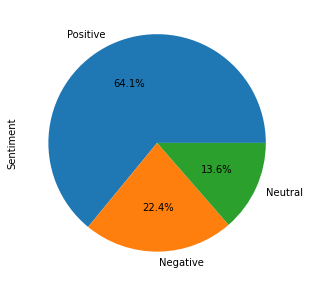

In [42]:
# Let us create two disjoint dataset of the type 'Free' and 'Paid'
type_free_df=merge_df[merge_df['Type']=='Free']
type_paid_df=merge_df[merge_df['Type']=='Paid']

# We will create a variable which contain unique 'Sentiment' and their count for the type 'Free'
Each_Sentiment_type_free=type_free_df['Sentiment'].value_counts()

# Creating the plot object
Each_Sentiment_type_free.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(5, 5))
plt.show()

Positive Have 64.11% ,Negative have 22.10% And Neutral have 13.79% in sentiments

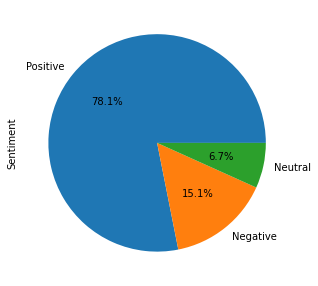

In [43]:
# We will create a variable which contain unique 'Sentiment' and their count for the type 'Paid'
Each_Sentiment_type_paid=type_paid_df['Sentiment'].value_counts()

# Creating the plot object
Each_Sentiment_type_paid.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(5, 5))
plt.show()

Positive Have 78.1% ,Negative have 15.10% And Neutral have 6.7% in sentiments

#Ploting Based on Rating By Installs And Sentiment in Merge DF

Text(0, 0.5, 'Review Count')

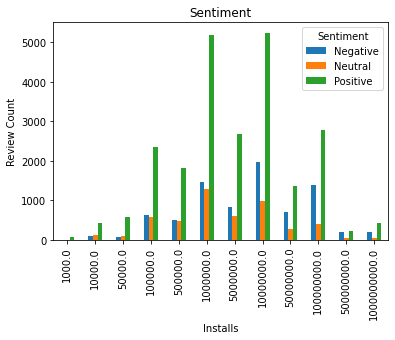

In [44]:
#Ploting Based on Rating By Installs And Sentiment in Merge DF
merge_df.groupby(['Installs','Sentiment'])['Rating'].count().unstack().plot(kind='bar')
plt.title('Sentiment')
plt.xlabel('Installs')
plt.ylabel('Review Count')

Highest Positive Installs w.r.t Review is of 100000 and 1000000

#Now we see the correlation between different columns.

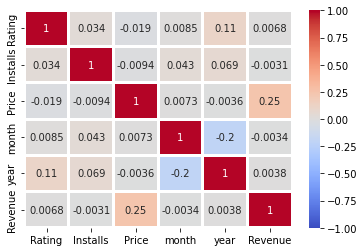

In [45]:
# Let check the correlation between Rating, Reviews, Installs , Price , Months and Year

sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='white')

From this correlation matrix, we see that reviews and installs are positively correlated. Also, if an app has higher number of installations then obviously it will have more reviews. One more thing to notice is that correlation of price with every column is less than 0.

#Now let's have box plots for size and rating

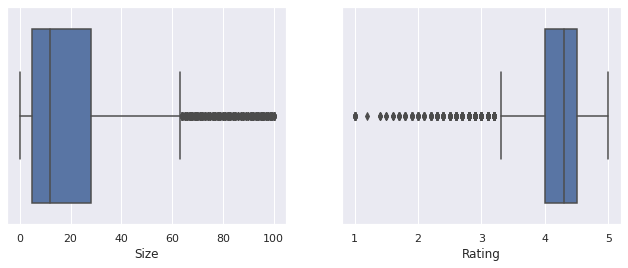

In [46]:
# plot the box plot of reviews, size, installs and price per rating

sns.set(rc={'figure.figsize':(11,4)})
fig, axes = plt.subplots(1,2)
sns.boxplot(data=df2,x='Rating', ax=axes[1])
sns.boxplot(data=df2[df2['Size']!='Varies with device'],x='Size', ax=axes[0])

The Maximum size is between 0 to 30 all other are outliers\
The Maximum rating is between 4 to 4.5 and all others are outliers

#Let's see the percentage of free and paid type apps 

Based On type

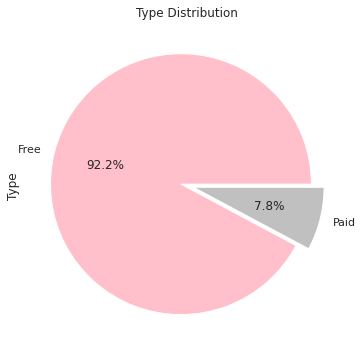

In [47]:
# Let check the Share of free and paid apps in terms of counts

df2['Type'].value_counts().plot.pie(y = df2['Type'], figsize = (8, 6), autopct = '%1.1f%%', title = 'Type Distribution',colors = ['pink','silver'],explode=(0.05,0.05) );

From the above pie chart,it can be easily seen that the percentage of free apps is much more than the percentage of paid apps.

# plot the graph of free and paid app count categories wise

Text(0.5, 0, 'Category')

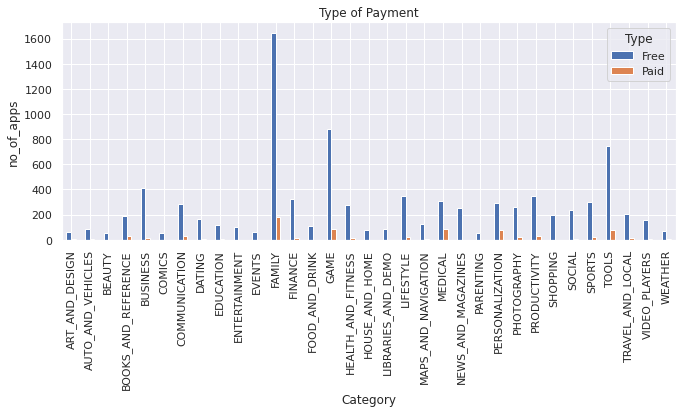

In [48]:
# plot the graph of free and paid app count categories wise

df2_price=df2.groupby(['Category','Type'])['App'].count().unstack()
df2_price= df2_price.fillna(0)

df2_price.plot(kind="bar")
plt.title('Type of Payment')
plt.ylabel('no_of_apps')
plt.xlabel('Category')

Family have highest number of Free App as compare to other Free Apps Same for Paid

#Based on Content Rating

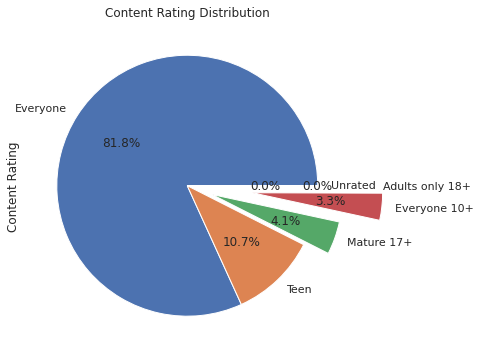

In [49]:
# Let check the Share of content rating in terms of counts

explode = [0, 0, 0.2, 0.5, 0.4,0]
pie=df2['Content Rating'].value_counts().plot.pie( figsize = (8, 6), autopct = '%1.1f%%', title = 'Content Rating Distribution',explode=explode)

Everyone Have 81.8%  Rating,Teen have 10.7% ,Mature 17+ have 4.1%, Everyone 10+ have 3.3% and Adults is underrated in Content Rating.

#Based on Category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


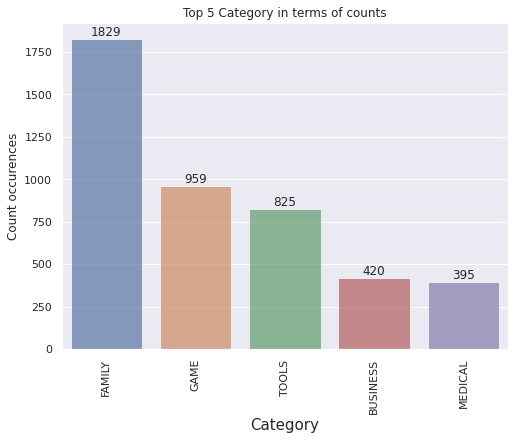

In [50]:
# plot the graph of Top 5 Category in terms of app count

category_count  = df2['Category'].value_counts().head(5)
plt.figure(figsize=(8,6))
sns.barplot(category_count.index, category_count.values,alpha=0.7)
plt.title('Top 5 Category in terms of counts')
plt.ylabel('Count occurences', fontsize=12)
plt.xlabel('Category', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(category_count.index)):
  plt.text(i,category_count.values[i],category_count.values[i],ha="center",va="bottom")
plt.show()

These are the top 5 category in terms of count. we can see that the category 'FAMILY' has the highest number of apps. 

#Now let's visualize the top 5 category in terms of installs.

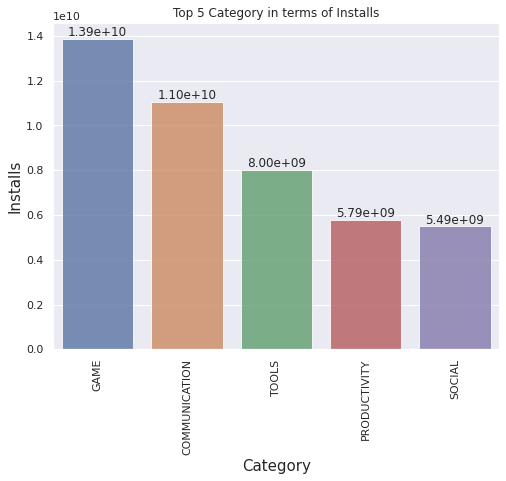

In [51]:
# plot the graph of Top 5 Category in terms of app Installs

categories = df2.groupby('Category')
sum_installs= categories[['Installs']].sum()
sum_installs=sum_installs.sort_values(by=['Installs'],ascending=False)
sum_installs= sum_installs.reset_index()
sum_installs=sum_installs.iloc[:5]
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Installs', data=sum_installs , alpha=0.8)
plt.title('Top 5 Category in terms of Installs')
plt.ylabel('Installs', fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(sum_installs)):
  plt.text(i,sum_installs.iloc[:5]['Installs'][i],"{:.2e}".format(sum_installs.iloc[:5]['Installs'][i]),ha="center",va="bottom")
plt.show()

These are the top 5 category in terms of installs. We can observe that the category 'GAME' has the highest number of installs. Thus if we want to make an app the categories 'GAME' and 'COMMUNICATION' should be the first choices of our app category. The category 'game' also has the most number of apps in the play store (second in category in terms of count) so building a gaming app that can give competition to already built gaming apps will be a tough job. The 'communication' category has less number of apps and it will be less difficult for us to build a good app in the 'communication' category. Let's get more insights for apps in the 'GAME' and 'COMMUNICATION' Category.

#based on rating

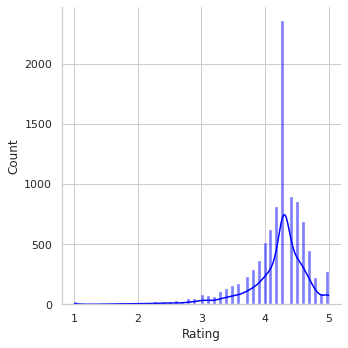

In [52]:
sns.set_style('whitegrid')
sns.displot(df2.Rating, kde=True, color='blue')

In the Above graph we can see that the highest rating is of 4.5 out of 0-5 range

# plot the graphs of reviews, size, installs and price per rating

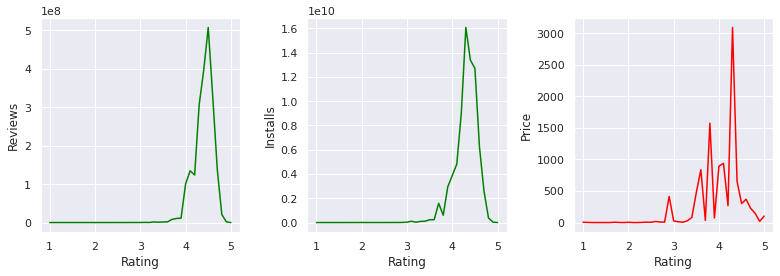

In [60]:
# plot the graphs of reviews, size, installs and price per rating
df2['Reviews'] = df2['Reviews'].apply(pd.to_numeric)

ratingdf = df2.groupby('Rating').sum().reset_index()
sns.set(rc={'figure.figsize':(11,4)})
fig, axes = plt.subplots(1,3)

#create lineplot in each subplot
sns.lineplot(data=ratingdf, x='Rating', y='Reviews',color='green', ax=axes[0])
sns.lineplot(data=ratingdf, x='Rating', y='Installs',color='green', ax=axes[1])
sns.lineplot(data=ratingdf, x='Rating', y='Price',color='red', ax=axes[2])
fig.tight_layout()
plt.show()

#Based on Size Range

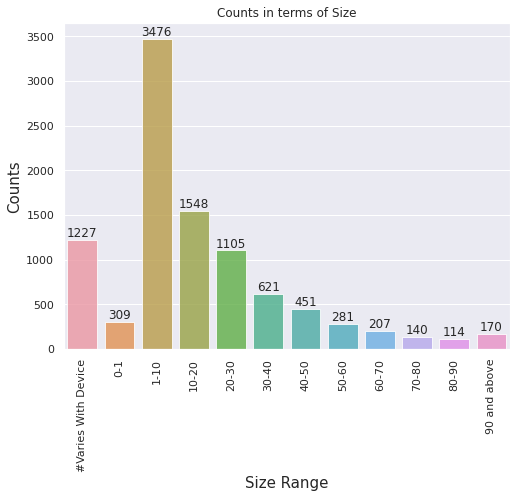

In [61]:
# plot the graph of app size and it's count

sizerange = df2.groupby('size_range')
count_size= sizerange[['Size']].count()
count_size= count_size.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='size_range', y='Size', data=count_size , alpha=0.8)
plt.title('Counts in terms of Size')
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Size Range', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(count_size)):
  plt.text(i,count_size['Size'][i],(count_size['Size'][i]),ha="center",va="bottom")
plt.show()

The Highest Size is Between 1-10Mb the count of it is 3476

In [ ]:
# plot the graph of app size and in terms of Installs

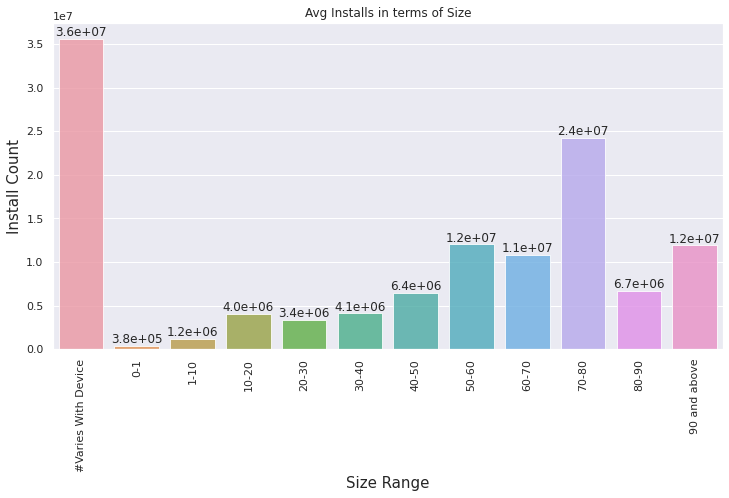

In [62]:
# plot the graph of app size and in terms of Installs

sizerange= df2.groupby('size_range')
mean_installs= sizerange[['Installs']].mean()
mean_installs= mean_installs.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='size_range', y='Installs', data=mean_installs , alpha=0.8)
plt.title('Avg Installs in terms of Size')
plt.ylabel('Install Count', fontsize=15)
plt.xlabel('Size Range', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(mean_installs)):
  plt.text(i,mean_installs['Installs'][i],"{:.1e}".format(mean_installs['Installs'][i]),ha="center",va="bottom")
plt.show()

plt.show()

Highest Installation have no size range it varies from device

plot the graph of app size and in terms of review count

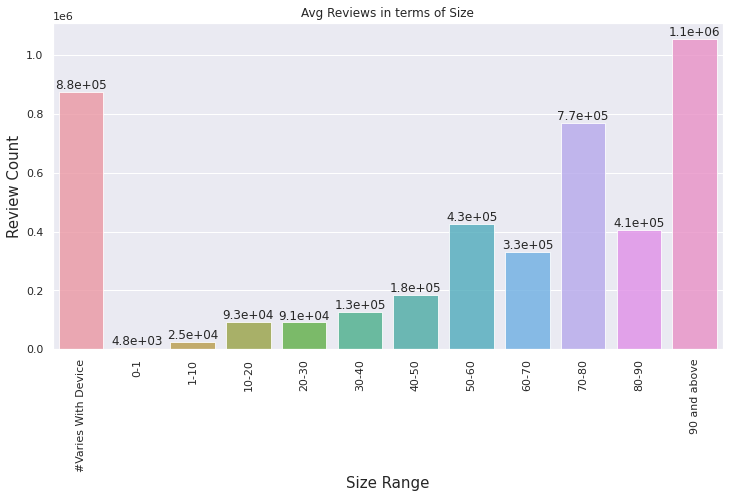

In [63]:
# plot the graph of app size and in terms of review count

sizerange= df2.groupby('size_range')
mean_review= sizerange[['Reviews']].mean()
mean_review= mean_review.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='size_range', y='Reviews', data=mean_review , alpha=0.8)
plt.title('Avg Reviews in terms of Size')
plt.ylabel('Review Count', fontsize=15)
plt.xlabel('Size Range', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(mean_installs)):
  plt.text(i,mean_review['Reviews'][i],"{:.1e}".format(mean_review['Reviews'][i]),ha="center",va="bottom")
plt.show()

The Highest Size range is of 90 and above w.r.t Reviews

#Based on Android Version

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


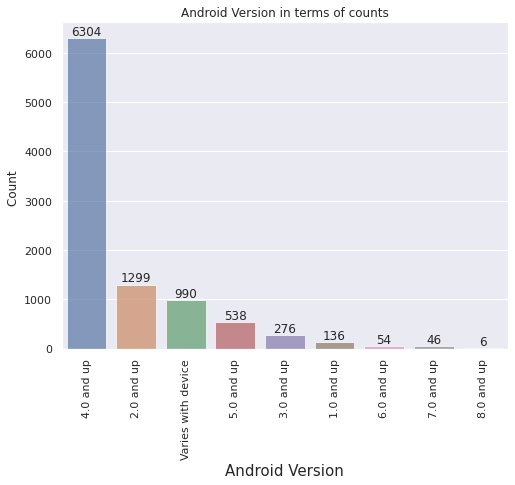

In [64]:
# plot the graph of adroid version in terms of app count

version  = df2['Android Ver'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(version.index, version.values,alpha=0.7)
plt.title('Android Version in terms of counts')
plt.ylabel('Count ', fontsize=12)
plt.xlabel('Android Version', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(version.index)):
  plt.text(i,version.values[i],version.values[i],ha="center",va="bottom")
plt.show()

The Most Used Android Version is 4.0 and Up the count is 6304

#Based On Last Update w.r.t Months

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


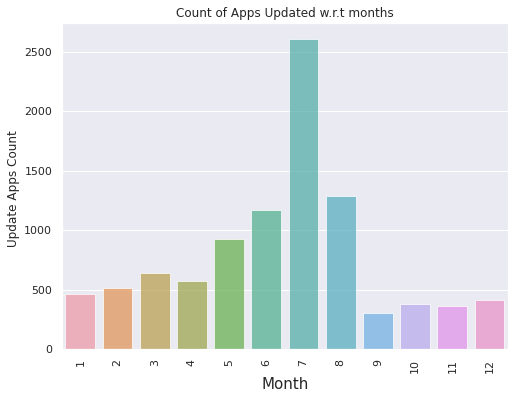

In [65]:
# plot the graph of app updates in month wise

month = df2['month'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(month.index, month.values,alpha=0.7)
plt.title('Count of Apps Updated w.r.t months')
plt.ylabel('Update Apps Count ', fontsize=12)
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=90)
plt.show()

w.r.t Month most updates are in the month of July

#Based On Last Update With Respect to Years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


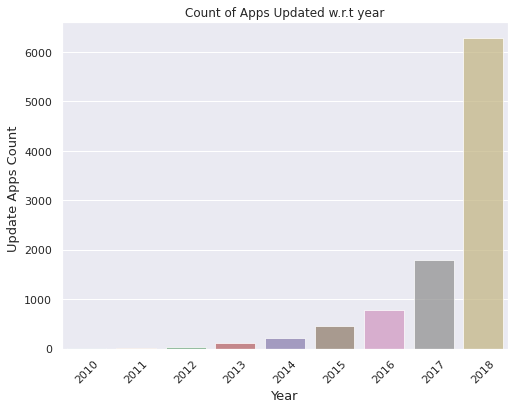

In [66]:
# plot the graph of app updates in Year wise

year = df2['year'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(year.index, year.values,alpha=0.7)
plt.title('Count of Apps Updated w.r.t year')
plt.ylabel('Update Apps Count ', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.xticks(rotation=45)
plt.show()

w.r.t Years most updates are in the year 2018

#Based On revenue Generation

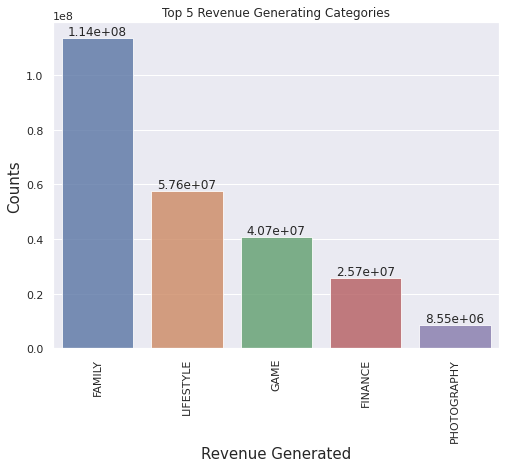

In [67]:
# plot the graphs of Top 5 Revenue Category

sizerange = df2.groupby('Category')
count_size= sizerange[['Revenue']].sum()
count_size=count_size.sort_values(by=['Revenue'],ascending=False)
count_size= count_size.reset_index()
count_size=count_size.head()

plt.figure(figsize=(8,6))
sns.barplot(y='Revenue', x='Category', data=count_size , alpha=0.8)
plt.title('Top 5 Revenue Generating Categories')
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Revenue Generated', fontsize=15)
plt.xticks(rotation=90)
for i in range(len(count_size)):
  plt.text(i,count_size['Revenue'][i],"{:.2e}".format((count_size['Revenue'][i])),ha="center",va="bottom")
plt.show()

Highest Revenue is of Family Category